In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/ML 2/Body Performance/bodyPerformance.csv'

Mounted at /content/drive


In [ ]:
df = pd.read_csv(file_path)
df.head()

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  27.0      M      172.3      75.24        21.3       80.0     130.0   
1  25.0      M      165.0      55.80        15.7       77.0     126.0   
2  31.0      M      179.6      78.00        20.1       92.0     152.0   
3  32.0      M      174.5      71.10        18.4       76.0     147.0   
4  28.0      M      173.8      67.70        17.1       70.0     127.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0       54.9                     18.4            60.0          217.0     C  
1       36.4                     16.3            53.0          229.0     A  
2       44.8                     12.0            49.0          181.0     C  
3       41.4                     15.2            53.0          219.0     B  
4       43.5                     27.1            45.0          217.0     B

**No missing values**

In [ ]:
df.isna().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

**Data types**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [ ]:
df['gender'] = df['gender'].astype('category')

In [ ]:
# Check unique values in gender column
unique_gender = df['gender'].unique()
print(unique_gender)

['M', 'F']
Categories (2, object): ['F', 'M']


In [ ]:
df['class'] = df['class'].astype('category')

In [ ]:
# Check unique values in class column
unique_classes = df['class'].unique()
print(unique_classes)

['C', 'A', 'B', 'D']
Categories (4, object): ['A', 'B', 'C', 'D']


**Duplicates**

In [ ]:
df.duplicated().sum()

1

In [ ]:
#remove duplicate
print(f'with duplicates:{df.shape}')
df.drop_duplicates(inplace=True)
print(f'without duplicates:{df.shape}')

with duplicates:(13393, 12)
without duplicates:(13392, 12)


**Response Variable**

In [ ]:
# Count the number of occurrences in each class
class_counts = df['class'].value_counts()

# Display the counts
print(class_counts)

class
C    3349
D    3349
A    3347
B    3347
Name: count, dtype: int64


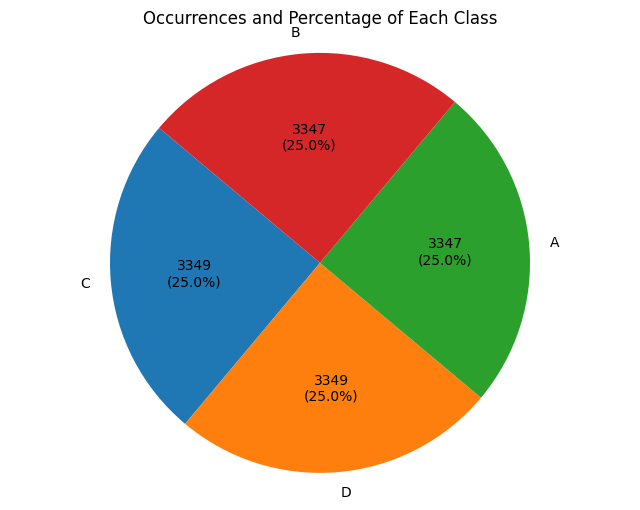

In [ ]:
import matplotlib.pyplot as plt

# Count the number of occurrences in each class
class_counts = df['class'].value_counts()

# Create a function to display both count and percentage
def func(pct, allvalues):
    absolute = int(round(pct / 100. * sum(allvalues)))
    return f'{absolute}\n({pct:.1f}%)'

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct=lambda pct: func(pct, class_counts), startangle=140)
plt.title('Occurrences and Percentage of Each Class')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

**Gender**

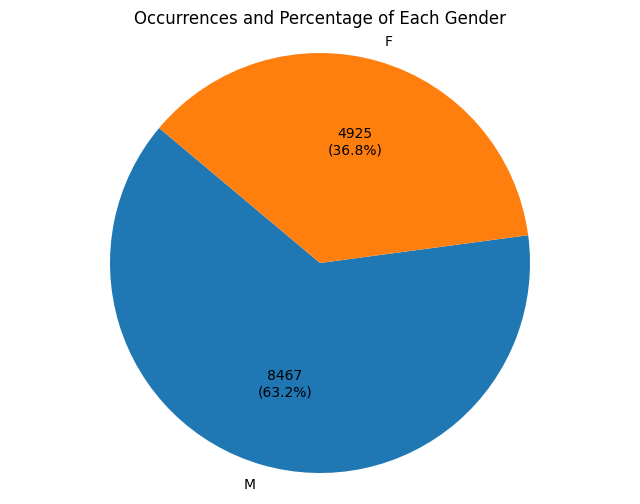

In [ ]:
# Count the number of occurrences for each gender
gender_counts = df['gender'].value_counts()

# Create a function to display both count and percentage
def func(pct, allvalues):
    absolute = int(round(pct / 100. * sum(allvalues)))
    return f'{absolute}\n({pct:.1f}%)'

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct=lambda pct: func(pct, gender_counts), startangle=140)
plt.title('Occurrences and Percentage of Each Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

**Age**

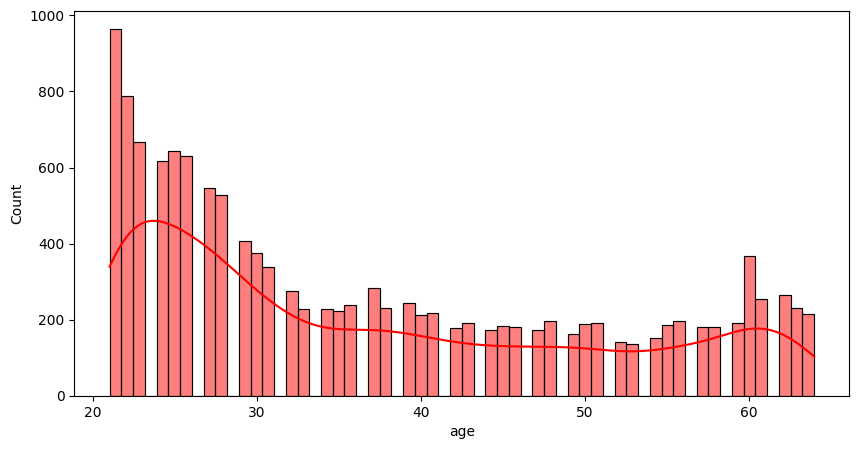

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="age", bins=60, kde=True, color='red')
plt.show()

In [ ]:
# Calculate min, max, and average
age_min = df['age'].min()
age_max = df['age'].max()
age_mean = df['age'].mean()

print(f"Minimum age: {age_min}")
print(f"Maximum age: {age_max}")
print(f"Average age: {age_mean:.2f}")  # rounded to 2 decimal places

Minimum age: 21.0
Maximum age: 64.0
Average age: 36.78


**Height**

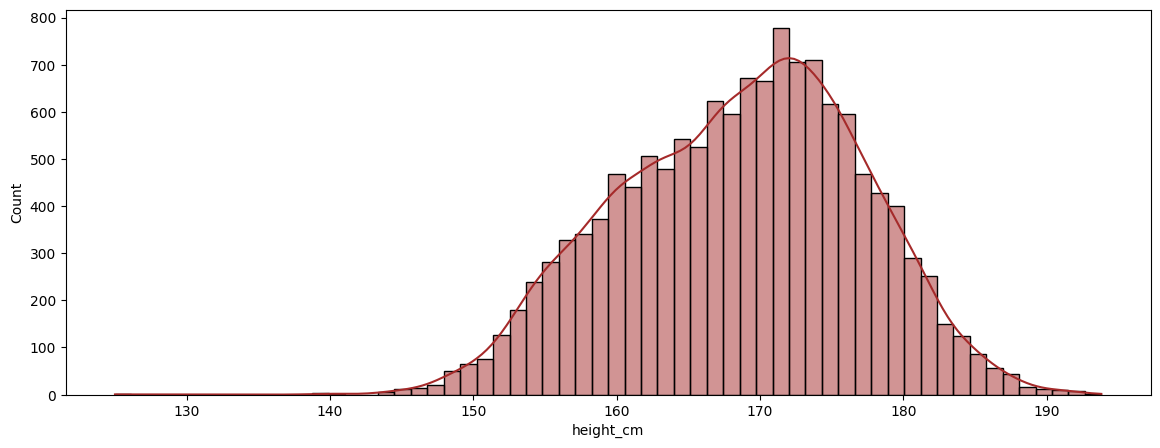

In [ ]:
plt.figure(figsize=(14, 5))
sns.histplot(data=df, x="height_cm", bins=60, kde=True, color='brown')
plt.show()

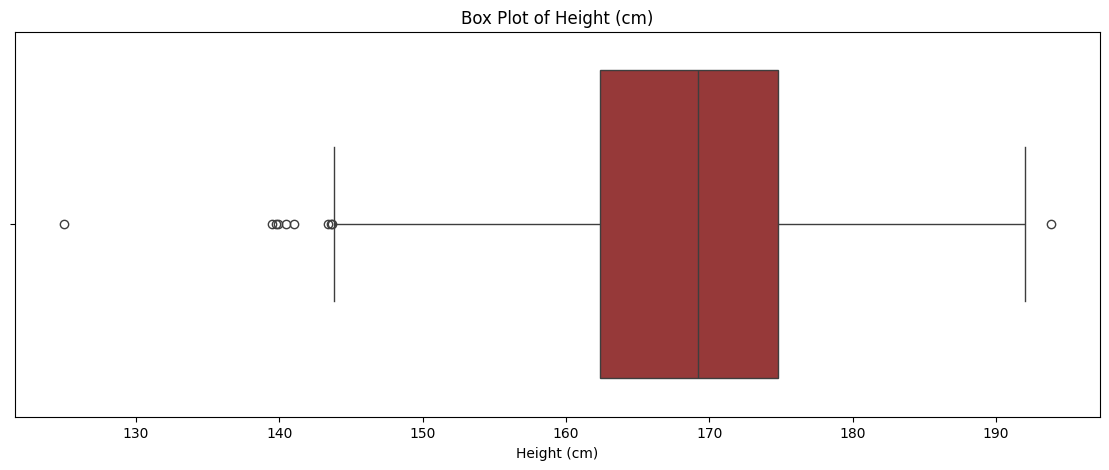

In [ ]:
# Set the figure size for height
plt.figure(figsize=(14, 5))

# Create a box plot for height
sns.boxplot(data=df, x="height_cm", color='brown')
plt.title('Box Plot of Height (cm)')
plt.xlabel('Height (cm)')

# Show the plot
plt.show()

**Weight**

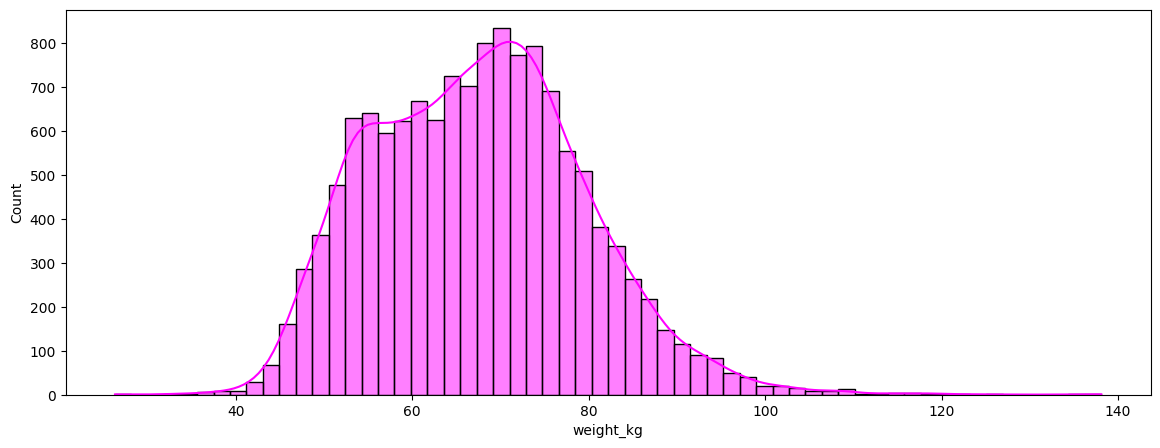

In [ ]:
plt.figure(figsize=(14, 5))
sns.histplot(data=df, x="weight_kg", bins=60, kde=True, color='magenta')
plt.show()

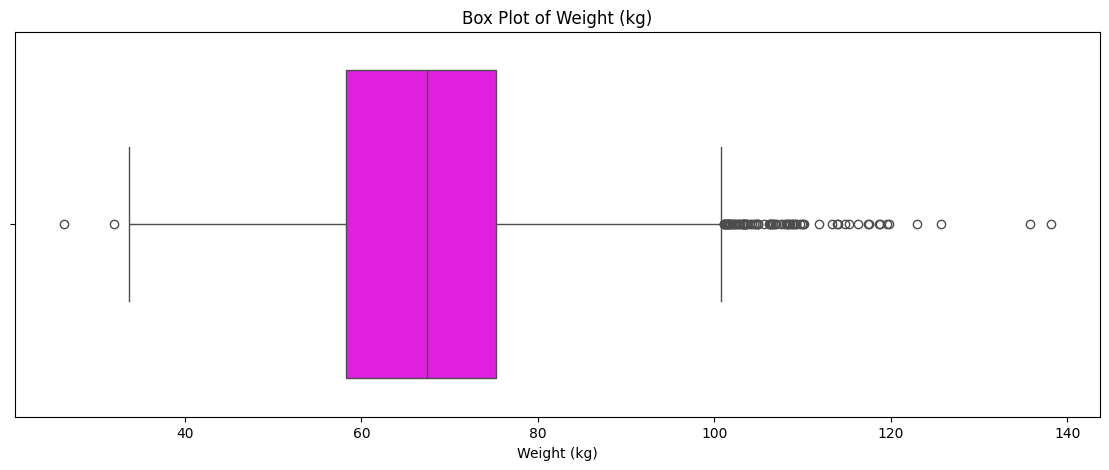

In [ ]:
# Set the figure size for weight
plt.figure(figsize=(14, 5))

# Create a box plot for weight
sns.boxplot(data=df, x="weight_kg", color='magenta')
plt.title('Box Plot of Weight (kg)')
plt.xlabel('Weight (kg)')

# Show the plot
plt.show()

**Body Fat %**

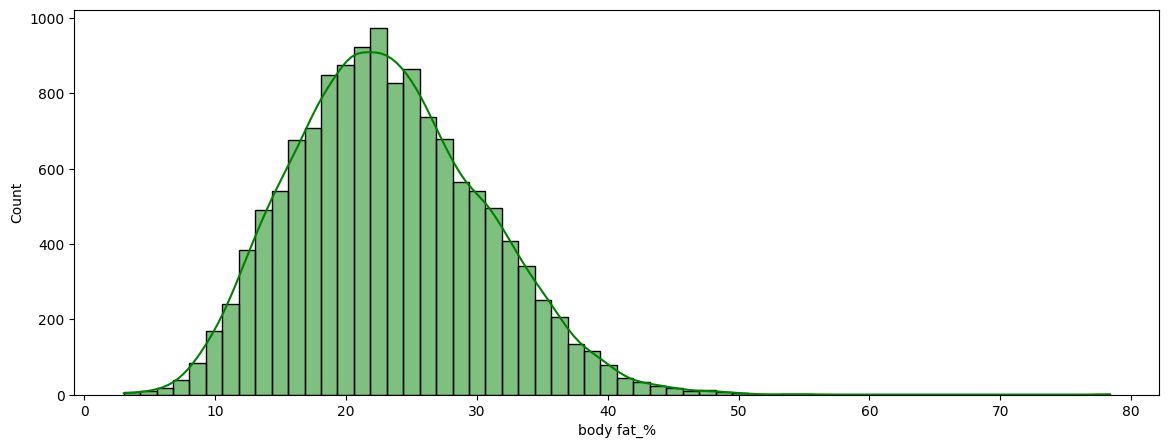

In [ ]:
plt.figure(figsize=(14, 5))
sns.histplot(data=df, x="body fat_%", bins=60, kde=True, color='green')
plt.show()

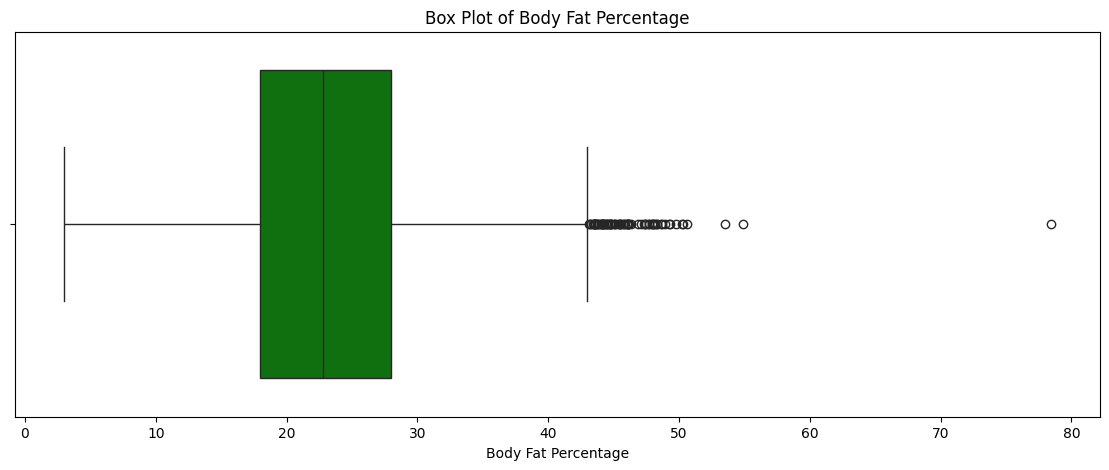

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 5))

# Create a box plot
sns.boxplot(data=df, x="body fat_%", color='green')
plt.title('Box Plot of Body Fat Percentage')
plt.xlabel('Body Fat Percentage')

# Show the plot
plt.show()

In [ ]:
# Display records where 'body fat_%' is greater than 75
print(df[df['body fat_%'] > 75])

      age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
735  21.0      M      177.6       74.5        78.4       69.0     122.0   

     gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
735       44.9                     26.1            59.0          235.0     A  


The body fat percentage of 78.4% seems unrealistic for a 21-year-old male with the provided height and weight whose fitness level is good. Hence we will remove that

In [ ]:
# Remove records where 'body fat_%' is greater than 75
df1 = df[df['body fat_%'] < 75]

# Display the updated DataFrame
print(df1)

        age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0      M      172.3      75.24        21.3       80.0     130.0   
1      25.0      M      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
13388  25.0      M      172.1      71.80        16.2       74.0     141.0   
13389  21.0      M      179.7      63.90        12.1       74.0     128.0   
13390  39.0      M      177.2      80.50        20.1       78.0     132.0   
13391  64.0      F      146.1      57.70        40.4       68.0     121.0   
13392  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm cl

In [ ]:
# Check the size of df1
df1.shape

(13391, 12)

**Sit and bend forward_cm**

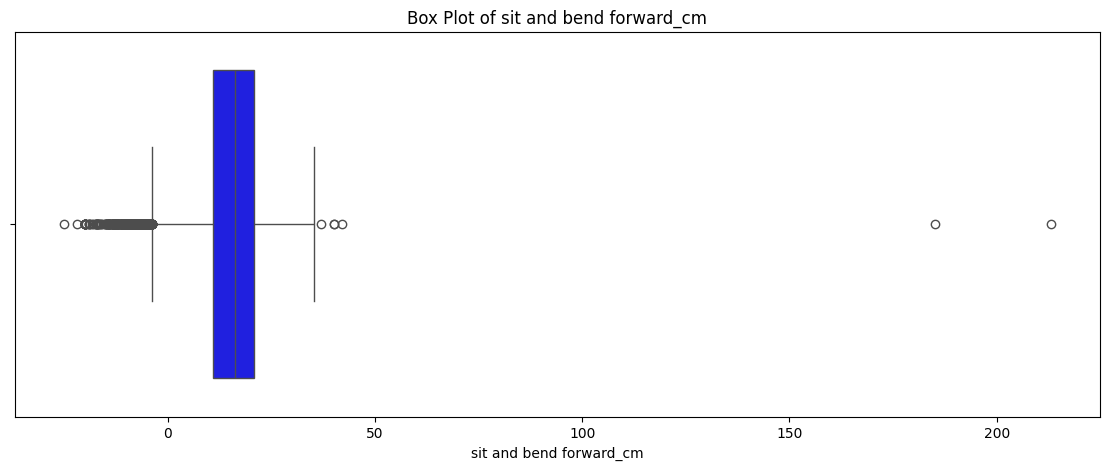

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 5))

# Create a box plot
sns.boxplot(data=df1, x="sit and bend forward_cm", color='blue')
plt.title('Box Plot of sit and bend forward_cm')
plt.xlabel('sit and bend forward_cm')

# Show the plot
plt.show()

In [ ]:
# Filter the DataFrame for sit and bend forward values greater than height
outliers_df = df1[df1['sit and bend forward_cm'] > df1['height_cm']]

# Print the outliers for inspection
print(outliers_df)

       age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
2657  33.0      M      165.6       60.4        17.8       81.0     127.0   
3355  45.0      M      164.4       64.4        24.3       96.0     142.0   

      gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
2657       38.6                    213.0            53.0          244.0     B  
3355       38.5                    185.0            44.0          223.0     A  


Two outliers can be seen from above which has unrealistic values

In [ ]:
# Display records where 'sit and bend forward_cm' is greater than or equal to 50
print(df1[df1['sit and bend forward_cm'] > 50])

       age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
2657  33.0      M      165.6       60.4        17.8       81.0     127.0   
3355  45.0      M      164.4       64.4        24.3       96.0     142.0   

      gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
2657       38.6                    213.0            53.0          244.0     B  
3355       38.5                    185.0            44.0          223.0     A  


Remove those 2 records

In [ ]:
# Remove records where 'sit and bend forward_cm' is greater than or equal to 50
df2 = df1[df1['sit and bend forward_cm'] < 50]

# Display the updated DataFrame
print(df2)

        age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0      M      172.3      75.24        21.3       80.0     130.0   
1      25.0      M      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
13388  25.0      M      172.1      71.80        16.2       74.0     141.0   
13389  21.0      M      179.7      63.90        12.1       74.0     128.0   
13390  39.0      M      177.2      80.50        20.1       78.0     132.0   
13391  64.0      F      146.1      57.70        40.4       68.0     121.0   
13392  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm cl

In [ ]:
# Find records with negative values in the 'sit and bend forward_cm' column
negative_records = df2[df2['sit and bend forward_cm'] < 0]

# Display the negative records
print(negative_records)

        age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
33     30.0      M      172.1      79.50    26.70000       91.0     148.0   
47     26.0      M      172.1      66.10    24.90000       62.0     102.0   
75     22.0      M      171.9      78.46    22.90000       64.0     116.0   
139    22.0      M      180.3      91.70    32.10000       75.0     134.0   
248    61.0      M      171.6      86.40    28.70000       70.0     142.0   
...     ...    ...        ...        ...         ...        ...       ...   
13280  26.0      M      173.5      68.70    15.16476       78.0     120.0   
13301  26.0      M      175.4      74.70    18.20000       93.0     150.0   
13318  25.0      M      187.9      94.90    19.40000       68.0     107.0   
13357  56.0      M      173.0      52.60    12.90000       92.0     141.0   
13380  42.0      M      172.0      76.30    32.80000      100.0     147.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm cl

The most logical measure is to use the level of the feet as recording zero, so that any measure that does not reach the toes is negative and any reach past the toes is positive
https://www.topendsports.com/testing/tests/sit-and-reach.htm

Hence we don't remove he negative values because they make sense

In [ ]:
# Check the size of df1
df2.shape

(13389, 12)

**Broad jump_cm**

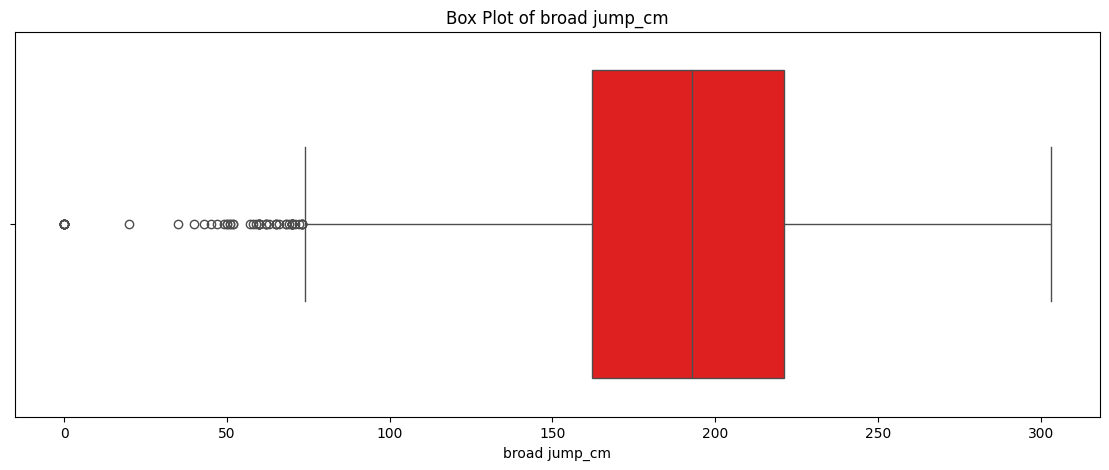

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 5))

# Create a box plot
sns.boxplot(data=df2, x="broad jump_cm", color='red')
plt.title('Box Plot of broad jump_cm')
plt.xlabel('broad jump_cm')

# Show the plot
plt.show()

In [ ]:
# Display records where 'broad jump_cm' is equal to 0
print(df2[df2['broad jump_cm'] == 0])

       age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
484   22.0      F      167.4       66.2        34.0       62.0     110.0   
712   58.0      M      168.7       76.1        27.5       84.0     139.0   
1919  59.0      F      162.9       61.0        32.6       82.0     123.0   
4756  28.0      M      176.6       82.2        20.7       83.0     126.0   
4900  60.0      F      162.2       67.3        41.8       47.0     131.0   
7366  50.0      M      178.2       88.4        23.4       85.0     146.0   
7721  56.0      F      156.0       51.1        28.4       73.0     113.0   
7944  45.0      F      153.4       33.7        16.1       81.0     124.0   
7954  61.0      F      153.0       64.6        31.4       77.0     152.0   
8599  60.0      F      160.0       76.9        50.3       82.0     141.0   

      gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
484        28.5                     11.2            38.0            0.0     C  
712

average	for males: 221-230cm
average for females: 171-180cm

while athletes can jump over 300cm as well.

College-aged males: The average Broad Jump distance for college-aged males is approximately 8-9 feet (2.4-2.7 meters).
College-aged females: The average Broad Jump distance for college-aged females is approximately 6-7 feet (1.8-2.1 meters).
High school athletes: The average Broad Jump distance for high school athletes is approximately 9-10 feet (2.7-3 meters) for males and 7-8 feet (2.1-2.4 meters) for females.
Professional basketball players: Professional basketball players have an average Broad Jump distance of 10-11 feet (3-3.4 meters).

Reference: https://www.matassessment.com/blog/broad-jump-test#:~:text=College%2Daged%20males%3A%20The%20average,(1.8%2D2.1%20meters).

But our dataset may contain people with disabilities.
It is possible for individuals with a broad jump of 0 or very less to still have reasonable scores in other tests (e.g., sit-ups and sit-and-bend-forward) as these tests may evaluate different aspects of fitness (e.g., flexibility).

HENCE WE WON'T REMOVE


**Systolic Rate**

In [ ]:
# Filter records where systolic is less than diastolic
invalid_records = df2[df2['systolic'] < df2['diastolic']]

# Display the invalid records
print(invalid_records)

        age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
7495   30.0      F      156.2      52.80        28.2      156.2     104.0   
7597   30.0      M      166.6      66.08        14.4       67.0      14.0   
8217   31.0      M      176.7      80.32        20.8       46.2      43.9   
12949  24.0      M      171.0      78.70        20.0       99.0      95.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
7495        21.7                     27.2            43.0          162.0     C  
7597        53.8                     17.2            57.0          221.0     A  
8217        43.9                     17.2            57.0          221.0     B  
12949       46.5                     12.8            50.0          197.0     D  


The systolic rate is always expected to be higher than the diastolic rate. Hence we will remove them.

In [ ]:
# Remove records where systolic is less than diastolic
df3 = df2[df2['systolic'] >= df2['diastolic']]

# Display the cleaned DataFrame
print(df3)

        age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0      M      172.3      75.24        21.3       80.0     130.0   
1      25.0      M      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
13388  25.0      M      172.1      71.80        16.2       74.0     141.0   
13389  21.0      M      179.7      63.90        12.1       74.0     128.0   
13390  39.0      M      177.2      80.50        20.1       78.0     132.0   
13391  64.0      F      146.1      57.70        40.4       68.0     121.0   
13392  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm cl

In [ ]:
df3.shape

(13385, 12)

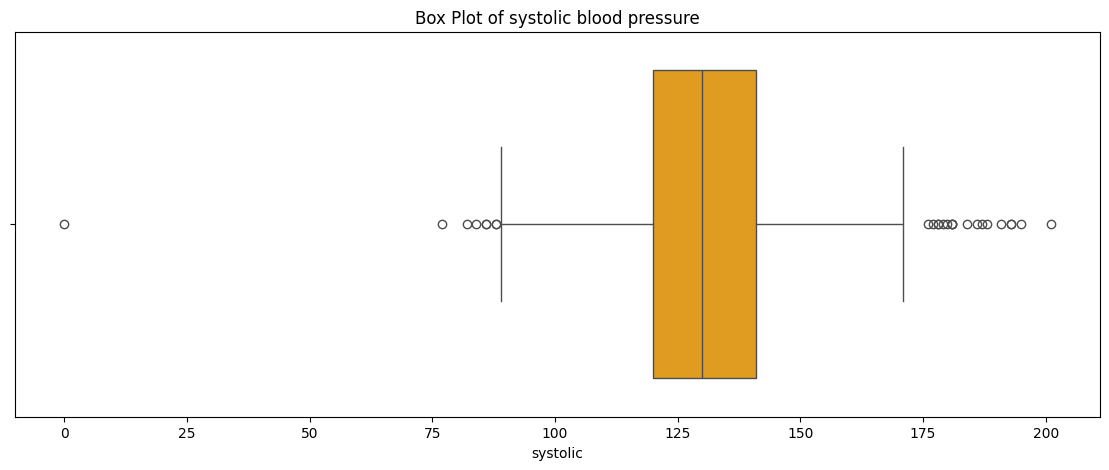

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 5))

# Create a box plot
sns.boxplot(data=df3, x="systolic", color='orange')
plt.title('Box Plot of systolic blood pressure')
plt.xlabel('systolic')

# Show the plot
plt.show()

0mmHg seems not possible

Furthermore, on the oppoosite side, systolic blood pressure of 200 mmHg is considered dangerously high and falls into the category of a hypertensive crisis. However that is a possible value.

In [ ]:
# Records where systolic is less than 20
print(df3[df3['systolic'] == 0])

        age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
10624  26.0      F      160.0      63.56        32.0        0.0       0.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
10624       23.7                     17.1            23.0          128.0     D  


In [ ]:
# Remove Records where systolic and diastolic is 0
df4 = df3[df3['systolic'] > 0]

In [ ]:
df4.shape

(13384, 12)

Diastolic pressure = 0 mmHg and systolic pressure = 0 mmHg: These are impossible values in a living individual, strongly indicating a data entry error. Hence removed

**Diastolic blood pressure**

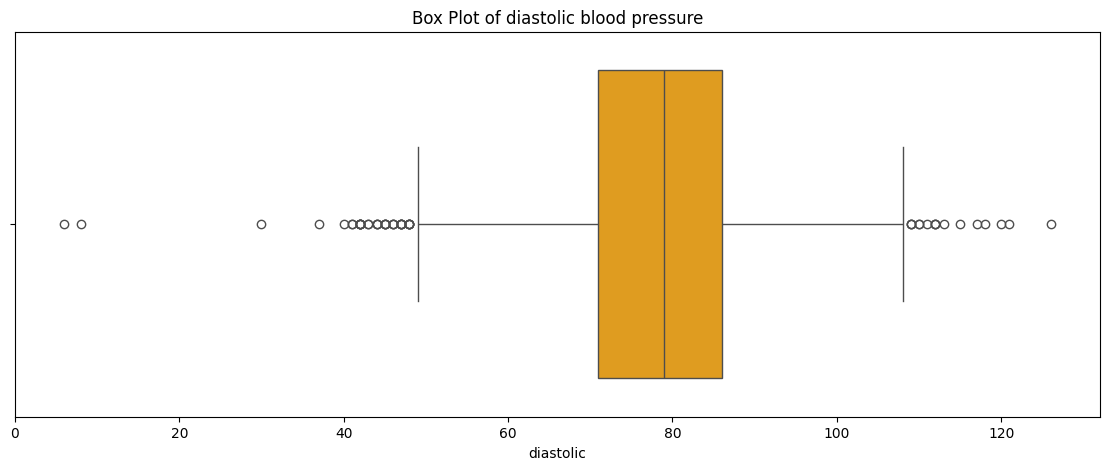

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 5))

# Create a box plot
sns.boxplot(data=df4, x="diastolic", color='orange')
plt.title('Box Plot of diastolic blood pressure')
plt.xlabel('diastolic')

# Show the plot
plt.show()

In [ ]:
# Records where diastolic is less than 20
print(df4[df4['diastolic'] < 20])

       age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
336   35.0      M      173.1      77.60        22.8        8.0     122.0   
3524  44.0      M      177.0      78.28        22.1        6.0     145.0   

      gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
336        46.4                     16.7            47.0          216.0     B  
3524       47.4                     10.5            42.0          215.0     B  


Diastolic pressure = 8 mmHg, 6mm. This is highly abnormal. Diastolic pressure below 40 mmHg is critical, and 8 and 6 is extremely low, suggesting a likely data error.

In [ ]:
# Remove records where systolic is less than diastolic
df5 = df4[df4['diastolic'] >= 20]

# Display the cleaned DataFrame
print(df5)

        age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0      M      172.3      75.24        21.3       80.0     130.0   
1      25.0      M      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
13388  25.0      M      172.1      71.80        16.2       74.0     141.0   
13389  21.0      M      179.7      63.90        12.1       74.0     128.0   
13390  39.0      M      177.2      80.50        20.1       78.0     132.0   
13391  64.0      F      146.1      57.70        40.4       68.0     121.0   
13392  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm cl

In [ ]:
df5.shape

(13382, 12)

**Correlation Heatmap**

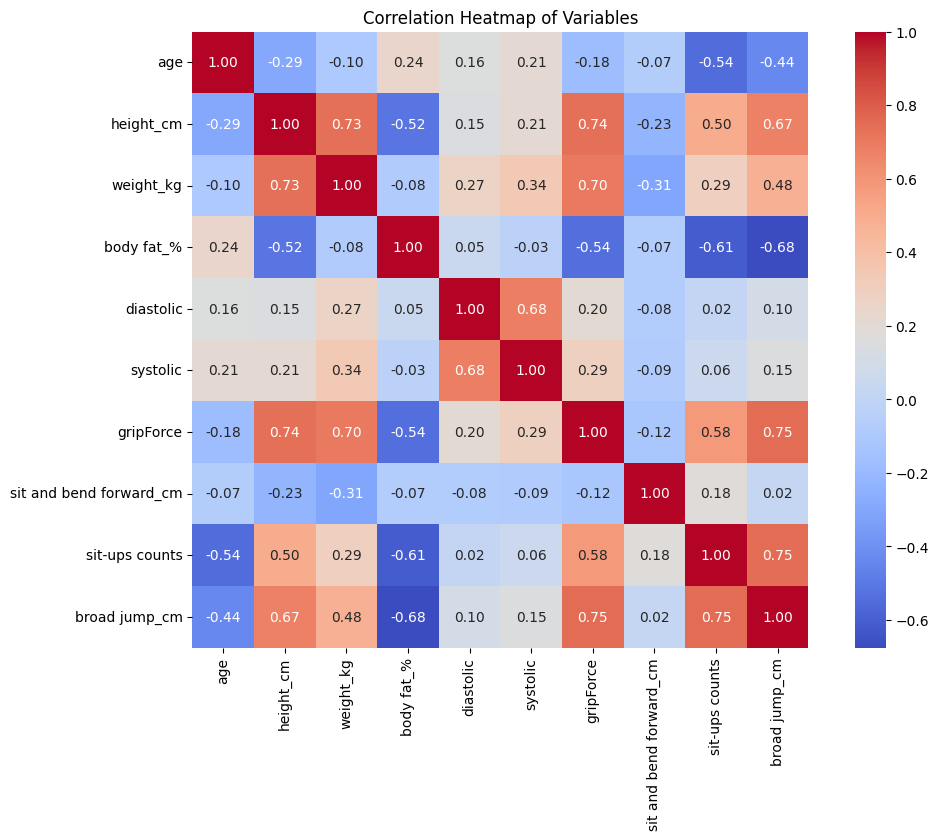

In [ ]:
# Drop the 'gender' and 'class' columns
correlation_data = df5.drop(columns=['gender', 'class'])

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title("Correlation Heatmap of Variables")
plt.show()

# **Feature Engineering**

**Creation of BMI variable**

In [ ]:
# Convert height from cm to meters
df5['height_m'] = df5['height_cm'] / 100

# Calculate BMI and create a new column
df5['bmi'] = df5['weight_kg'] / (df5['height_m'] ** 2)

# Optionally drop the 'height_m' column if you don't need it anymore
df5 = df5.drop(columns=['height_m'])

# Display the updated dataframe
df5.head()

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  27.0      M      172.3      75.24        21.3       80.0     130.0   
1  25.0      M      165.0      55.80        15.7       77.0     126.0   
2  31.0      M      179.6      78.00        20.1       92.0     152.0   
3  32.0      M      174.5      71.10        18.4       76.0     147.0   
4  28.0      M      173.8      67.70        17.1       70.0     127.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  \
0       54.9                     18.4            60.0          217.0     C   
1       36.4                     16.3            53.0          229.0     A   
2       44.8                     12.0            49.0          181.0     C   
3       41.4                     15.2            53.0          219.0     B   
4       43.5                     27.1            45.0          217.0     B   

         bmi  
0  25.344179  
1  20.495868  
2  24.181428  
3  23.349562  
4  22.412439

**Creation of MAP(Mean Arterial Pressure)**

The Mean Arterial Pressure (MAP) is a derived variable that provides a more comprehensive view of blood pressure over the cardiac cycle. It reflects the average pressure in a person's arteries during one heartbeat, incorporating both SBP and DBP into a single metric.

In [ ]:
# Create a new variable 'map' (Mean Arterial Pressure)
df5['map'] = (df5['systolic'] + 2 * df5['diastolic']) / 3

# Display the updated dataframe
df5.head()

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  27.0      M      172.3      75.24        21.3       80.0     130.0   
1  25.0      M      165.0      55.80        15.7       77.0     126.0   
2  31.0      M      179.6      78.00        20.1       92.0     152.0   
3  32.0      M      174.5      71.10        18.4       76.0     147.0   
4  28.0      M      173.8      67.70        17.1       70.0     127.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  \
0       54.9                     18.4            60.0          217.0     C   
1       36.4                     16.3            53.0          229.0     A   
2       44.8                     12.0            49.0          181.0     C   
3       41.4                     15.2            53.0          219.0     B   
4       43.5                     27.1            45.0          217.0     B   

         bmi         map  
0  25.344179   96.666667  
1  20.495868   93.333333  
2  24.181428  112.000000  
3  23.349562   99.666667  
4  22.412439   89.000000

### One Hot encoding

In [ ]:
# One-hot encoding with drop_first to remove the first column
df5 = pd.get_dummies(df5, columns=['gender'], drop_first=True)

# Convert boolean columns to integers (1s and 0s)
for col in df5.columns:
    if df5[col].dtype == 'bool':
        df5[col] = df5[col].astype(int)

print(df5)

        age  height_cm  weight_kg  body fat_%  diastolic  systolic  gripForce  \
0      27.0      172.3      75.24        21.3       80.0     130.0       54.9   
1      25.0      165.0      55.80        15.7       77.0     126.0       36.4   
2      31.0      179.6      78.00        20.1       92.0     152.0       44.8   
3      32.0      174.5      71.10        18.4       76.0     147.0       41.4   
4      28.0      173.8      67.70        17.1       70.0     127.0       43.5   
...     ...        ...        ...         ...        ...       ...        ...   
13388  25.0      172.1      71.80        16.2       74.0     141.0       35.8   
13389  21.0      179.7      63.90        12.1       74.0     128.0       33.0   
13390  39.0      177.2      80.50        20.1       78.0     132.0       63.5   
13391  64.0      146.1      57.70        40.4       68.0     121.0       19.3   
13392  34.0      164.0      66.10        19.5       82.0     150.0       35.9   

       sit and bend forward

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13382 entries, 0 to 13392
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      13382 non-null  float64 
 1   height_cm                13382 non-null  float64 
 2   weight_kg                13382 non-null  float64 
 3   body fat_%               13382 non-null  float64 
 4   diastolic                13382 non-null  float64 
 5   systolic                 13382 non-null  float64 
 6   gripForce                13382 non-null  float64 
 7   sit and bend forward_cm  13382 non-null  float64 
 8   sit-ups counts           13382 non-null  float64 
 9   broad jump_cm            13382 non-null  float64 
 10  class                    13382 non-null  category
 11  bmi                      13382 non-null  float64 
 12  map                      13382 non-null  float64 
 13  gender_M                 13382 non-null  int64   
dtypes: category

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Columns to exclude from scaling
exclude_cols = ['class', 'gender_M']

# Identify columns to scale (all numeric columns except excluded ones)
scale_cols = [col for col in df5.columns if col not in exclude_cols]

# Initialize scaler
scaler = MinMaxScaler()

# Fit and transform only the selected columns
df5[scale_cols] = scaler.fit_transform(df5[scale_cols])

df5

age  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      0.139535   0.687500   0.437746    0.352601   0.520833  0.427419   
1      0.093023   0.581395   0.263864    0.244701   0.489583  0.395161   
2      0.232558   0.793605   0.462433    0.329480   0.645833  0.604839   
3      0.255814   0.719477   0.400716    0.296724   0.479167  0.564516   
4      0.162791   0.709302   0.370304    0.271676   0.416667  0.403226   
...         ...        ...        ...         ...        ...       ...   
13388  0.093023   0.684593   0.406977    0.254335   0.458333  0.516129   
13389  0.000000   0.795058   0.336315    0.175337   0.458333  0.411290   
13390  0.418605   0.758721   0.484794    0.329480   0.500000  0.443548   
13391  1.000000   0.306686   0.280859    0.720617   0.395833  0.354839   
13392  0.302326   0.566860   0.355993    0.317919   0.541667  0.588710   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  \
0       0.778723                 0.647761          0.7500       0.716172   
1       0.516312                 0.616418          0.6625       0.755776   
2       0.635461                 0.552239          0.6125       0.597360   
3       0.587234                 0.600000          0.6625       0.722772   
4       0.617021                 0.777612          0.5625       0.716172   
...          ...                      ...             ...            ...   
13388   0.507801                 0.632836          0.5875       0.653465   
13389   0.468085                 0.389552          0.6000       0.551155   
13390   0.900709                 0.617910          0.5625       0.755776   
13391   0.273759                 0.510448          0.0000       0.247525   
13392   0.509220                 0.479104          0.6375       0.594059   

      class       bmi       map  gender_M  
0         C  0.447769  0.460265         1  
1         A  0.295319  0.427152         1  
2         C  0.411208  0.612583         1  
3         B  0.385051  0.490066         1  
4         B  0.355584  0.384106         1  
...     ...       ...       ...       ...  
13388     C  0.413102  0.456954         1  
13389     D  0.273065  0.413907         1  
13390     A  0.456979  0.453642         1  
13391     D  0.500836  0.350993         0  
13392     C  0.423619  0.539735         1  

[13382 rows x 14 columns]

# **Splitting to train and test**

In [ ]:
# Select the columns for X and y
X = df5[['age', 'body fat_%', 'gripForce', 'sit and bend forward_cm',
         'sit-ups counts', 'broad jump_cm', 'bmi', 'map', 'gender_M']]
y = df5['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Analysis**

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Example: Train a Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict on the training set
y_pred_train = log_reg.predict(X_train)
# Predict on the test set
y_pred_test = log_reg.predict(X_test)

# Evaluate the model on the training set
print("Logistic Regression Performance on Training Set:")
print("Classification Report:")
print(classification_report(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_train, y_pred_train))

# Evaluate the model on the test set
print("\nLogistic Regression Performance on Test Set:")
print("Classification Report:")
print(classification_report(y_test, y_pred_test))
print("Accuracy:", accuracy_score(y_test, y_pred_test))

Logistic Regression Performance on Training Set:
Classification Report:
              precision    recall  f1-score   support

           A       0.67      0.75      0.71      2662
           B       0.47      0.44      0.45      2712
           C       0.53      0.49      0.51      2643
           D       0.76      0.78      0.77      2688

    accuracy                           0.61     10705
   macro avg       0.61      0.61      0.61     10705
weighted avg       0.61      0.61      0.61     10705

Accuracy: 0.6120504437178889

Logistic Regression Performance on Test Set:
Classification Report:
              precision    recall  f1-score   support

           A       0.69      0.75      0.72       682
           B       0.43      0.42      0.42       631
           C       0.55      0.50      0.53       705
           D       0.75      0.79      0.77       659

    accuracy                           0.61      2677
   macro avg       0.61      0.61      0.61      2677
weighted avg   

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

# Fit the model on the resampled training data
rf_clf.fit(X_train, y_train)

# Predict on the training set
y_pred_train_rf = rf_clf.predict(X_train)
# Predict on the test set
y_pred_test_rf = rf_clf.predict(X_test)

# Evaluate the model on the training set
print("Random Forest Performance on Training Set:")
print("Classification Report:")
print(classification_report(y_train, y_pred_train_rf))
print("Accuracy:", accuracy_score(y_train, y_pred_train_rf))

# Evaluate the model on the test set
print("\nRandom Forest Performance on Test Set:")
print("Classification Report:")
print(classification_report(y_test, y_pred_test_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_test_rf))


Random Forest Performance on Training Set:
Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00      2662
           B       1.00      1.00      1.00      2712
           C       1.00      1.00      1.00      2643
           D       1.00      1.00      1.00      2688

    accuracy                           1.00     10705
   macro avg       1.00      1.00      1.00     10705
weighted avg       1.00      1.00      1.00     10705

Accuracy: 1.0

Random Forest Performance on Test Set:
Classification Report:
              precision    recall  f1-score   support

           A       0.73      0.86      0.79       682
           B       0.59      0.62      0.60       631
           C       0.73      0.67      0.70       705
           D       0.93      0.81      0.87       659

    accuracy                           0.74      2677
   macro avg       0.75      0.74      0.74      2677
weighted avg       0.75      0.74      0.7

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define the parameter grid to reduce overfitting
param_grid = {
    'n_estimators': [100, 200,300],  # Keep it reasonable
    'max_depth': [None, 10, 20]  # Limit the depth of the trees

}

# Initialize RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV for cross-validation
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best model
best_rf_clf = grid_search.best_estimator_

# Predict on the training set using the best model
y_pred_train_best_rf = best_rf_clf.predict(X_train)
# Predict on the test set using the best model
y_pred_test_best_rf = best_rf_clf.predict(X_test)

# Evaluate the model on the training set
print("Random Forest Performance on Training Set (Tuned):")
print("Classification Report:")
print(classification_report(y_train, y_pred_train_best_rf))
print("Accuracy:", accuracy_score(y_train, y_pred_train_best_rf))

# Evaluate the model on the test set
print("\nRandom Forest Performance on Test Set (Tuned):")
print("Classification Report:")
print(classification_report(y_test, y_pred_test_best_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_test_best_rf))


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Random Forest Performance on Training Set (Tuned):
Classification Report:
              precision    recall  f1-score   support

           A       0.99      1.00      1.00      2662
           B       1.00      1.00      1.00      2712
           C       1.00      1.00      1.00      2643
           D       1.00      1.00      1.00      2688

    accuracy                           1.00     10705
   macro avg       1.00      1.00      1.00     10705
weighted avg       1.00      1.00      1.00     10705

Accuracy: 0.9985053713218123

Random Forest Performance on Test Set (Tuned):
Classification Report:
              precision    recall  f1-score   support

           A       0.73      0.86      0.79       682
           B       0.60      0.63      0.61       631
           C       0.75      0.67      0.71       705
           D       0.93      0.82      0.87       659

    accuracy                           0.75      2677
   ma

## SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize Support Vector Classifier
svm_clf = SVC(random_state=42)

# Fit the model on the resampled training data
svm_clf.fit(X_train, y_train)

# Predict on the training set
y_pred_train_svm = svm_clf.predict(X_train)
# Predict on the test set
y_pred_test_svm = svm_clf.predict(X_test)

# Evaluate the model on the training set
print("Support Vector Machine Performance on Training Set:")
print("Classification Report:")
print(classification_report(y_train, y_pred_train_svm))
print("Accuracy:", accuracy_score(y_train, y_pred_train_svm))

# Evaluate the model on the test set
print("\nSupport Vector Machine Performance on Test Set:")
print("Classification Report:")
print(classification_report(y_test, y_pred_test_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_test_svm))


Support Vector Machine Performance on Training Set:
Classification Report:
              precision    recall  f1-score   support

           A       0.69      0.80      0.74      2662
           B       0.53      0.57      0.55      2712
           C       0.66      0.62      0.64      2643
           D       0.90      0.76      0.83      2688

    accuracy                           0.69     10705
   macro avg       0.70      0.69      0.69     10705
weighted avg       0.70      0.69      0.69     10705

Accuracy: 0.68640822045773

Support Vector Machine Performance on Test Set:
Classification Report:
              precision    recall  f1-score   support

           A       0.71      0.79      0.75       682
           B       0.49      0.56      0.52       631
           C       0.66      0.60      0.62       705
           D       0.92      0.76      0.83       659

    accuracy                           0.68      2677
   macro avg       0.69      0.68      0.68      2677
weighted av

## Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Fit the model on the resampled training data
gb_clf.fit(X_train, y_train)

# Predict on the training set
y_pred_train_gb = gb_clf.predict(X_train)
# Predict on the test set
y_pred_test_gb = gb_clf.predict(X_test)

# Evaluate the model on the training set
print("Gradient Boosting Performance on Training Set:")
print("Classification Report:")
print(classification_report(y_train, y_pred_train_gb))
print("Accuracy:", accuracy_score(y_train, y_pred_train_gb))

# Evaluate the model on the test set
print("\nGradient Boosting Performance on Test Set:")
print("Classification Report:")
print(classification_report(y_test, y_pred_test_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_test_gb))


Gradient Boosting Performance on Training Set:
Classification Report:
              precision    recall  f1-score   support

           A       0.72      0.90      0.80      2662
           B       0.67      0.66      0.66      2712
           C       0.79      0.70      0.74      2643
           D       0.95      0.83      0.89      2688

    accuracy                           0.77     10705
   macro avg       0.78      0.77      0.77     10705
weighted avg       0.78      0.77      0.77     10705

Accuracy: 0.7727230266230734

Gradient Boosting Performance on Test Set:
Classification Report:
              precision    recall  f1-score   support

           A       0.71      0.86      0.78       682
           B       0.54      0.59      0.57       631
           C       0.72      0.61      0.66       705
           D       0.93      0.81      0.86       659

    accuracy                           0.72      2677
   macro avg       0.73      0.72      0.72      2677
weighted avg       

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize KNeighborsClassifier
knn_clf = KNeighborsClassifier()

# Fit the model on the resampled training data
knn_clf.fit(X_train, y_train)

# Predict on both the training and test sets
y_train_pred_knn = knn_clf.predict(X_train)
y_test_pred_knn = knn_clf.predict(X_test)

# Evaluate the model on the training set
print("K-Nearest Neighbors Performance on Training Set:")
print(classification_report(y_train, y_train_pred_knn))
print("Training Set Accuracy:", accuracy_score(y_train, y_train_pred_knn))

# Evaluate the model on the test set
print("\nK-Nearest Neighbors Performance on Test Set:")
print(classification_report(y_test, y_test_pred_knn))
print("Test Set Accuracy:", accuracy_score(y_test, y_test_pred_knn))

K-Nearest Neighbors Performance on Training Set:
              precision    recall  f1-score   support

           A       0.69      0.91      0.78      2662
           B       0.64      0.65      0.64      2712
           C       0.74      0.64      0.69      2643
           D       0.95      0.75      0.84      2688

    accuracy                           0.74     10705
   macro avg       0.75      0.74      0.74     10705
weighted avg       0.75      0.74      0.74     10705

Training Set Accuracy: 0.7381597384399813

K-Nearest Neighbors Performance on Test Set:
              precision    recall  f1-score   support

           A       0.63      0.85      0.73       682
           B       0.44      0.50      0.47       631
           C       0.62      0.50      0.55       705
           D       0.93      0.69      0.79       659

    accuracy                           0.63      2677
   macro avg       0.66      0.63      0.63      2677
weighted avg       0.66      0.63      0.63     

## Logistic Ridge

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize Logistic Regression with Ridge (L2) regularization
log_reg_ridge = LogisticRegression(penalty='l2', random_state=42, max_iter=1000)

# Fit the model on the resampled training data
log_reg_ridge.fit(X_train, y_train)

# Predict on both the training and test sets
y_train_pred_log_reg_ridge = log_reg_ridge.predict(X_train)
y_test_pred_log_reg_ridge = log_reg_ridge.predict(X_test)

# Evaluate the model on the training set
print("Logistic Regression Ridge Performance on Training Set:")
print(classification_report(y_train, y_train_pred_log_reg_ridge))
print("Training Set Accuracy:", accuracy_score(y_train, y_train_pred_log_reg_ridge))

# Evaluate the model on the test set
print("\nLogistic Regression Ridge Performance on Test Set:")
print(classification_report(y_test, y_test_pred_log_reg_ridge))
print("Test Set Accuracy:", accuracy_score(y_test, y_test_pred_log_reg_ridge))


Logistic Regression Ridge Performance on Training Set:
              precision    recall  f1-score   support

           A       0.67      0.75      0.71      2662
           B       0.47      0.44      0.45      2712
           C       0.53      0.49      0.51      2643
           D       0.76      0.78      0.77      2688

    accuracy                           0.61     10705
   macro avg       0.61      0.61      0.61     10705
weighted avg       0.61      0.61      0.61     10705

Training Set Accuracy: 0.6120504437178889

Logistic Regression Ridge Performance on Test Set:
              precision    recall  f1-score   support

           A       0.69      0.75      0.72       682
           B       0.43      0.42      0.42       631
           C       0.55      0.50      0.53       705
           D       0.75      0.79      0.77       659

    accuracy                           0.61      2677
   macro avg       0.61      0.61      0.61      2677
weighted avg       0.61      0.61   

## Logistic Lasso

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize Logistic Regression with Lasso (L1) regularization
log_reg_lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, max_iter=1000)

# Fit the model on the resampled training data
log_reg_lasso.fit(X_train, y_train_pred_knn)

# Predict on both the training and test sets
y_train_pred_log_reg_lasso = log_reg_lasso.predict(X_train)
y_test_pred_log_reg_lasso = log_reg_lasso.predict(X_test)

# Evaluate the model on the training set
print("Logistic Regression Lasso Performance on Training Set:")
print(classification_report(y_train, y_train_pred_log_reg_lasso))
print("Training Set Accuracy:", accuracy_score(y_train, y_train_pred_log_reg_lasso))

# Evaluate the model on the test set
print("\nLogistic Regression Lasso Performance on Test Set:")
print(classification_report(y_test, y_test_pred_log_reg_lasso))
print("Test Set Accuracy:", accuracy_score(y_test, y_test_pred_log_reg_lasso))

Logistic Regression Lasso Performance on Training Set:
              precision    recall  f1-score   support

           A       0.55      0.94      0.69      2662
           B       0.44      0.37      0.40      2712
           C       0.58      0.31      0.40      2643
           D       0.80      0.74      0.77      2688

    accuracy                           0.59     10705
   macro avg       0.59      0.59      0.57     10705
weighted avg       0.59      0.59      0.57     10705

Training Set Accuracy: 0.5874824848201775

Logistic Regression Lasso Performance on Test Set:
              precision    recall  f1-score   support

           A       0.56      0.92      0.70       682
           B       0.37      0.37      0.37       631
           C       0.61      0.28      0.38       705
           D       0.81      0.75      0.78       659

    accuracy                           0.58      2677
   macro avg       0.59      0.58      0.56      2677
weighted avg       0.59      0.58   

# XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize XGBClassifier
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Fit the model on the resampled training data
xgb_clf.fit(X_train, y_train_encoded)

# Predict on the training set
y_pred_train_xgb = xgb_clf.predict(X_train)
# Predict on the test set
y_pred_test_xgb = xgb_clf.predict(X_test)

# Decode the predictions back to original labels
y_pred_train_xgb = label_encoder.inverse_transform(y_pred_train_xgb)
y_pred_test_xgb = label_encoder.inverse_transform(y_pred_test_xgb)

# Evaluate the model on the training set
print("XGBoost Performance on Training Set:")
print("Classification Report:")
print(classification_report(y_train, y_pred_train_xgb))
print("Accuracy:", accuracy_score(y_train, y_pred_train_xgb))

# Evaluate the model on the test set
print("\nXGBoost Performance on Test Set:")
print("Classification Report:")
print(classification_report(y_test, y_pred_test_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_test_xgb))


XGBoost Performance on Training Set:
Classification Report:
              precision    recall  f1-score   support

           A       0.90      0.99      0.94      2662
           B       0.93      0.92      0.93      2712
           C       0.97      0.91      0.94      2643
           D       1.00      0.96      0.98      2688

    accuracy                           0.95     10705
   macro avg       0.95      0.95      0.95     10705
weighted avg       0.95      0.95      0.95     10705

Accuracy: 0.9476879962634283

XGBoost Performance on Test Set:
Classification Report:
              precision    recall  f1-score   support

           A       0.75      0.85      0.79       682
           B       0.58      0.62      0.60       631
           C       0.74      0.66      0.70       705
           D       0.94      0.85      0.89       659

    accuracy                           0.75      2677
   macro avg       0.75      0.74      0.75      2677
weighted avg       0.75      0.75      

# LDA

Normality of features within each class:
Feature 'age' in Class 'A': p-value=0.0000
 - The feature 'age' is not normally distributed in class 'A' (p < 0.05)
Feature 'age' in Class 'B': p-value=0.0000
 - The feature 'age' is not normally distributed in class 'B' (p < 0.05)
Feature 'age' in Class 'C': p-value=0.0000
 - The feature 'age' is not normally distributed in class 'C' (p < 0.05)
Feature 'age' in Class 'D': p-value=0.0000
 - The feature 'age' is not normally distributed in class 'D' (p < 0.05)

Feature 'body fat_%' in Class 'A': p-value=0.0000
 - The feature 'body fat_%' is not normally distributed in class 'A' (p < 0.05)
Feature 'body fat_%' in Class 'B': p-value=0.0000
 - The feature 'body fat_%' is not normally distributed in class 'B' (p < 0.05)
Feature 'body fat_%' in Class 'C': p-value=0.0000
 - The feature 'body fat_%' is not normally distributed in class 'C' (p < 0.05)
Feature 'body fat_%' in Class 'D': p-value=0.0307
 - The feature 'body fat_%' is not normally distribute

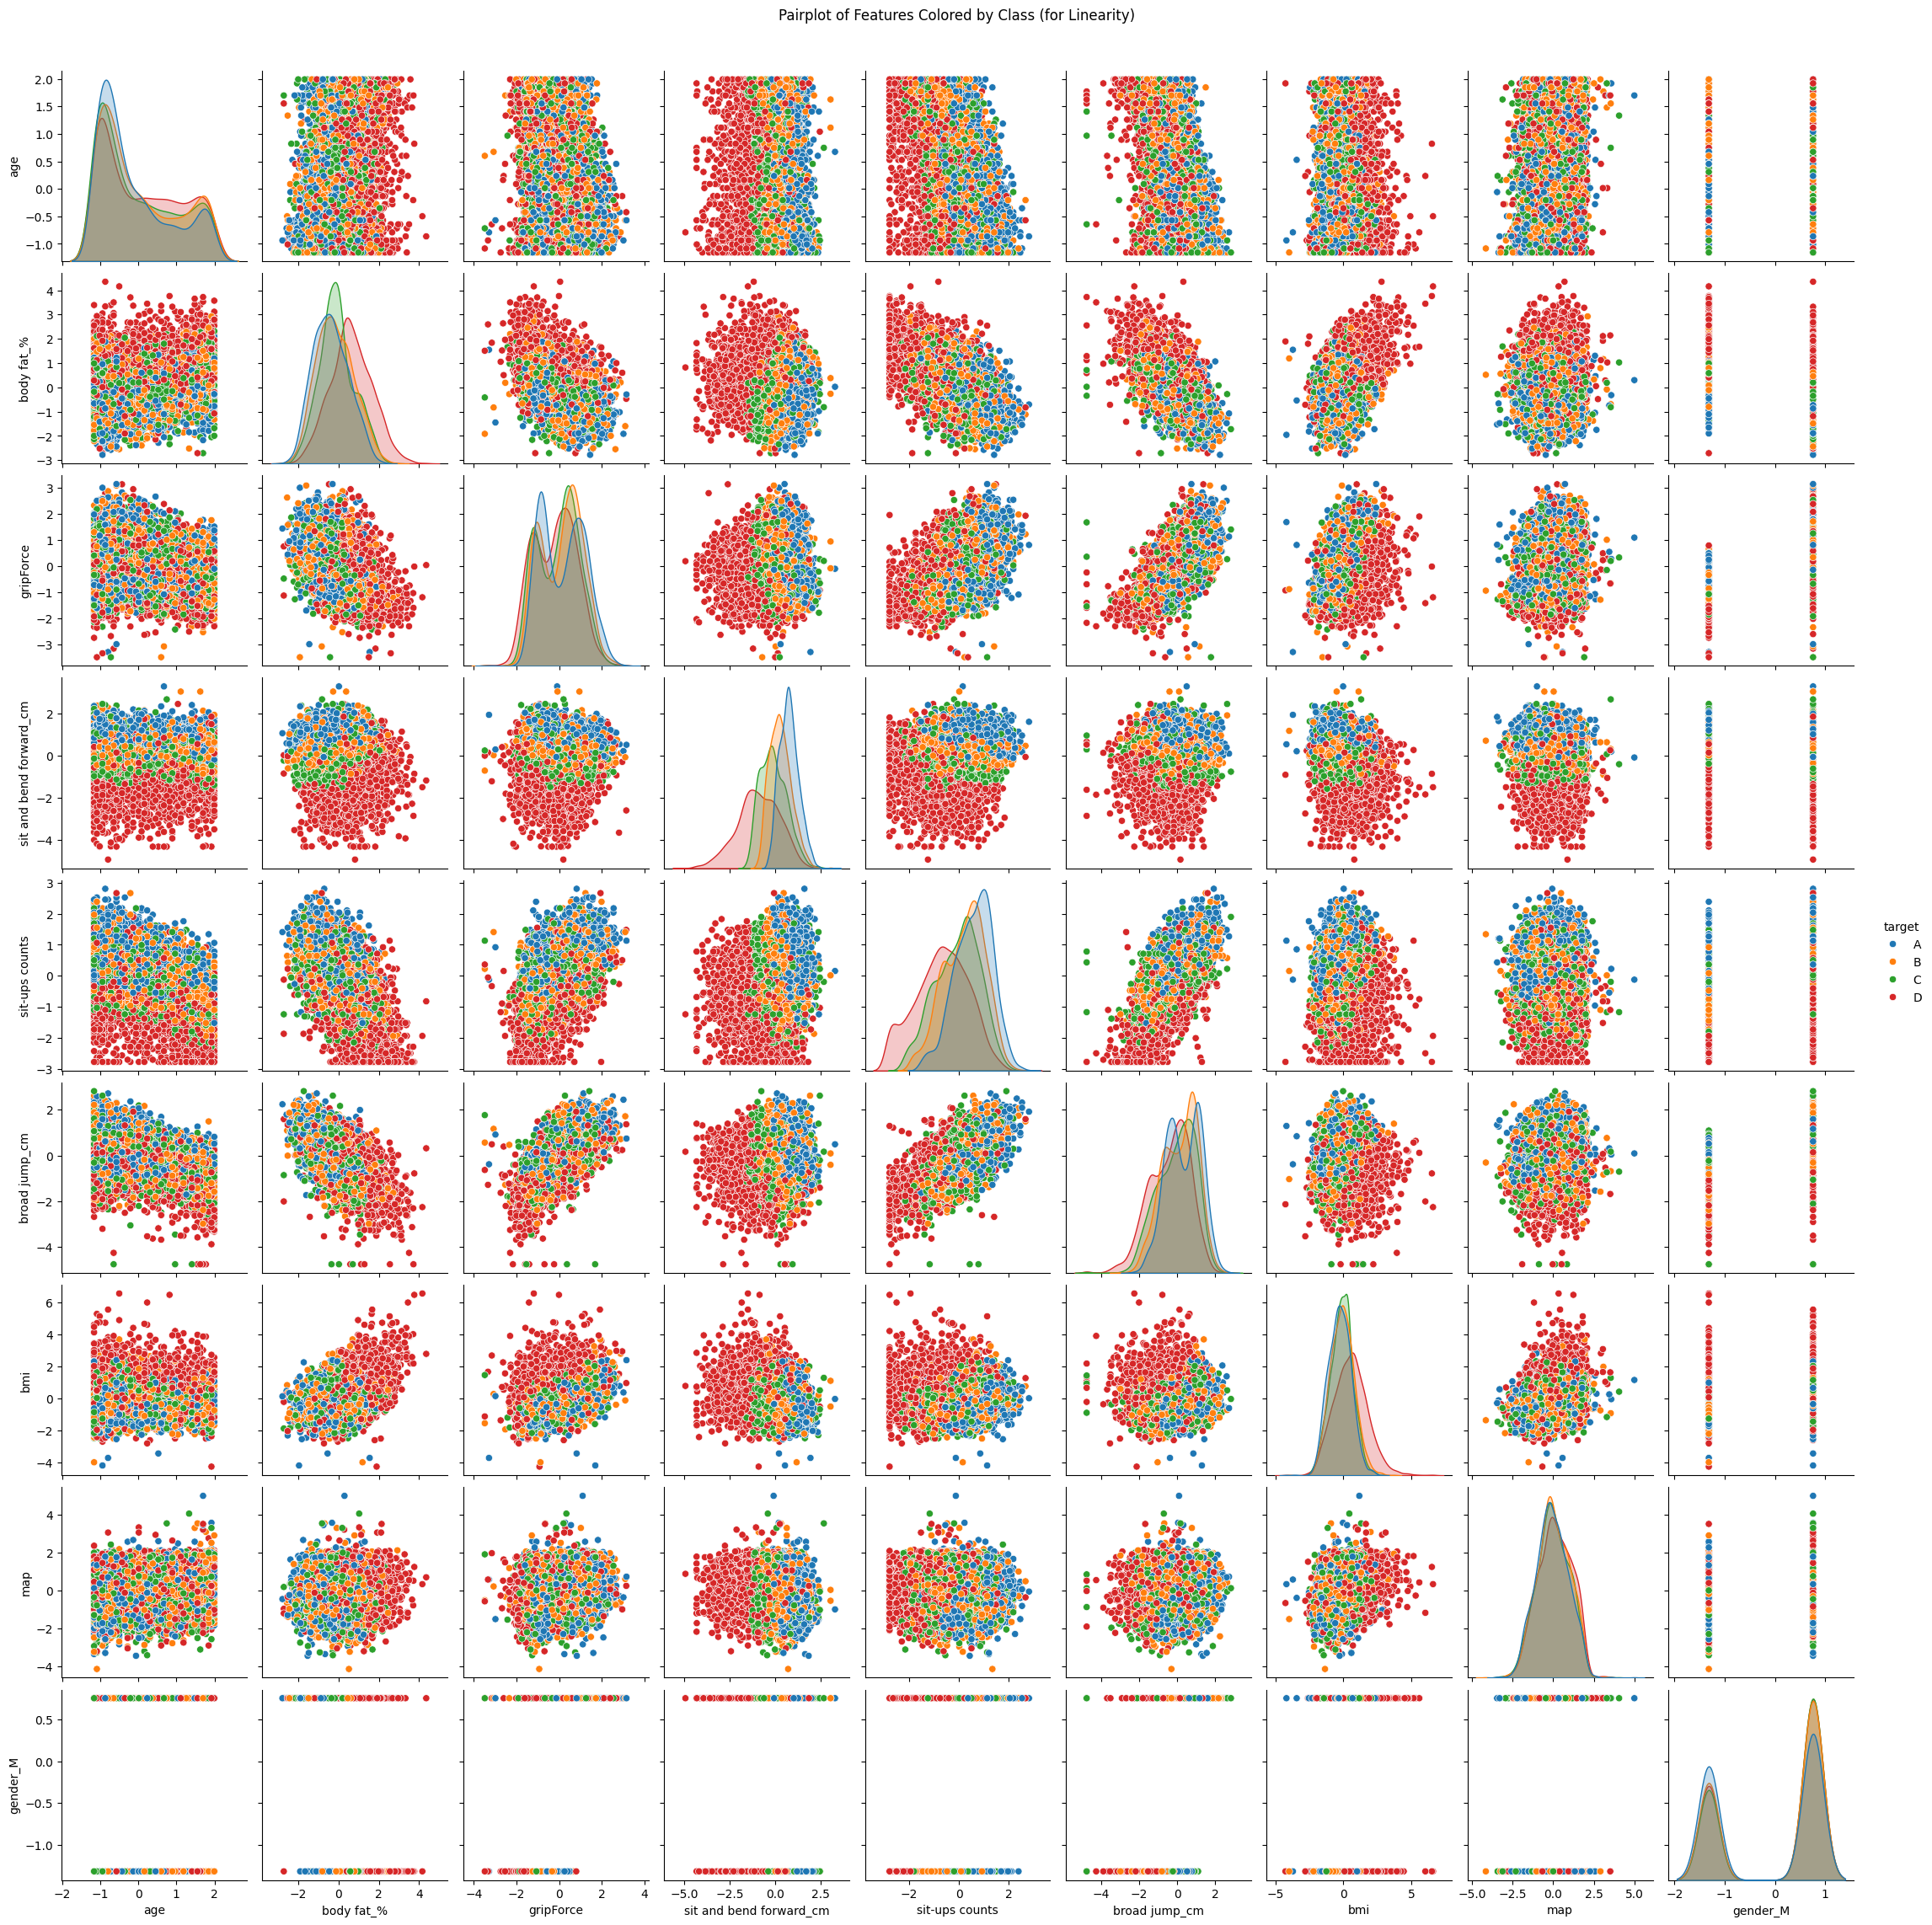

Checking for Multicollinearity using VIF:
                   feature       VIF
0                      age  1.880266
1               body fat_%  3.872906
2                gripForce  4.126116
3  sit and bend forward_cm  1.544529
4           sit-ups counts  3.134796
5            broad jump_cm  4.675499
6                      bmi  2.572359
7                      map  1.227739
8                 gender_M  5.049282


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Standardize features for consistency
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Convert scaled data back to DataFrame for easier handling
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Reset indices to ensure alignment
X_train_df = X_train_df.reset_index(drop=True)
y_train_reset = y_train.reset_index(drop=True)

# Check Assumption 1: Normality of each feature within each class
print("Normality of features within each class:")
for feature in X_train_df.columns:
    for cls in np.unique(y_train_reset):
        # Select the feature data for the current class
        feature_data = X_train_df[feature][y_train_reset == cls]

        # Perform the Shapiro-Wilk test
        stat, p = shapiro(feature_data)
        print(f"Feature '{feature}' in Class '{cls}': p-value={p:.4f}")
        if p < 0.05:
            print(f" - The feature '{feature}' is not normally distributed in class '{cls}' (p < 0.05)")
    print()  # Separate output by feature

# Check Assumption 2: Equal Variance-Covariance Matrix across classes
print("Variance-Covariance Matrix Check:")
covariances = []
for cls in np.unique(y_train_reset):
    cov_matrix = np.cov(X_train_df[y_train_reset == cls].T)
    covariances.append(cov_matrix)

for i in range(len(covariances) - 1):
    diff = np.abs(covariances[i] - covariances[i+1]).mean()
    print(f"Difference between class {i} and {i+1} covariance matrix: {diff:.4f}")
    if diff > 0.05:
        print(f" - Significant difference found (>{0.05}) in covariance matrices between classes.")

# Check Assumption 3: Linearity
sns.pairplot(X_train_df.assign(target=y_train_reset), hue='target', diag_kind='kde')
plt.suptitle("Pairplot of Features Colored by Class (for Linearity)", y=1.02)
plt.show()

# Check Assumption 4: No Multicollinearity (Variance Inflation Factor - VIF)
print("Checking for Multicollinearity using VIF:")
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_df.values, i) for i in range(len(X_train_df.columns))]
print(vif_data)
if vif_data["VIF"].max() > 10:
    print(" - High multicollinearity detected (VIF > 10). Consider removing or combining features.")

